In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 8.4/8.4 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import cv2
import numpy as np
import tensorflow

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [18]:
import matplotlib.pyplot as plt
folder_dir=r"C:\Users\VITTAL\Downloads\ecg.csv"

In [19]:
data=[]
label=[]
SIZE=128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\VITTAL\\Downloads\\ecg.csv'

In [14]:
data_arr=np.array(data)
label_arr=np.array(label)

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [17]:
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation="softmax"))


In [18]:
datagen = ImageDataGenerator(
       rotation_range=20,
       zoom_range=0.20,
       width_shift_range=0.3,
       height_shift_range=0.3, 
       horizontal_flip=True,
       vertical_flip=True)
datagen.fit(X_train)

In [19]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=8
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(X_test,y_test),
                              verbose = 1)

C:\Users\VITTAL\AppData\Local\Temp/ipykernel_9288/196478046.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),


Epoch 1/8
109/109 [==============================] - 34s 280ms/step - loss: 1.4590 - accuracy: 0.3548 - val_loss: 1.2428 - val_accuracy: 0.4740
Epoch 2/8
109/109 [==============================] - 26s 235ms/step - loss: 1.2393 - accuracy: 0.4564 - val_loss: 1.2160 - val_accuracy: 0.4902
Epoch 3/8
109/109 [==============================] - 19s 174ms/step - loss: 1.1836 - accuracy: 0.4899 - val_loss: 1.1349 - val_accuracy: 0.5513
Epoch 4/8
109/109 [==============================] - 19s 176ms/step - loss: 1.1481 - accuracy: 0.5165 - val_loss: 1.1253 - val_accuracy: 0.5767
Epoch 5/8
109/109 [==============================] - 22s 206ms/step - loss: 1.1099 - accuracy: 0.5358 - val_loss: 1.1156 - val_accuracy: 0.5352
Epoch 6/8
109/109 [==============================] - 21s 188ms/step - loss: 1.1038 - accuracy: 0.5548 - val_loss: 1.1045 - val_accuracy: 0.5640
Epoch 7/8
109/109 [==============================] - 21s 190ms/step - loss: 1.0876 - accuracy: 0.5551 - val_loss: 1.0466 - val_accuracy:

28/28 [==============================] - 1s 22ms/step


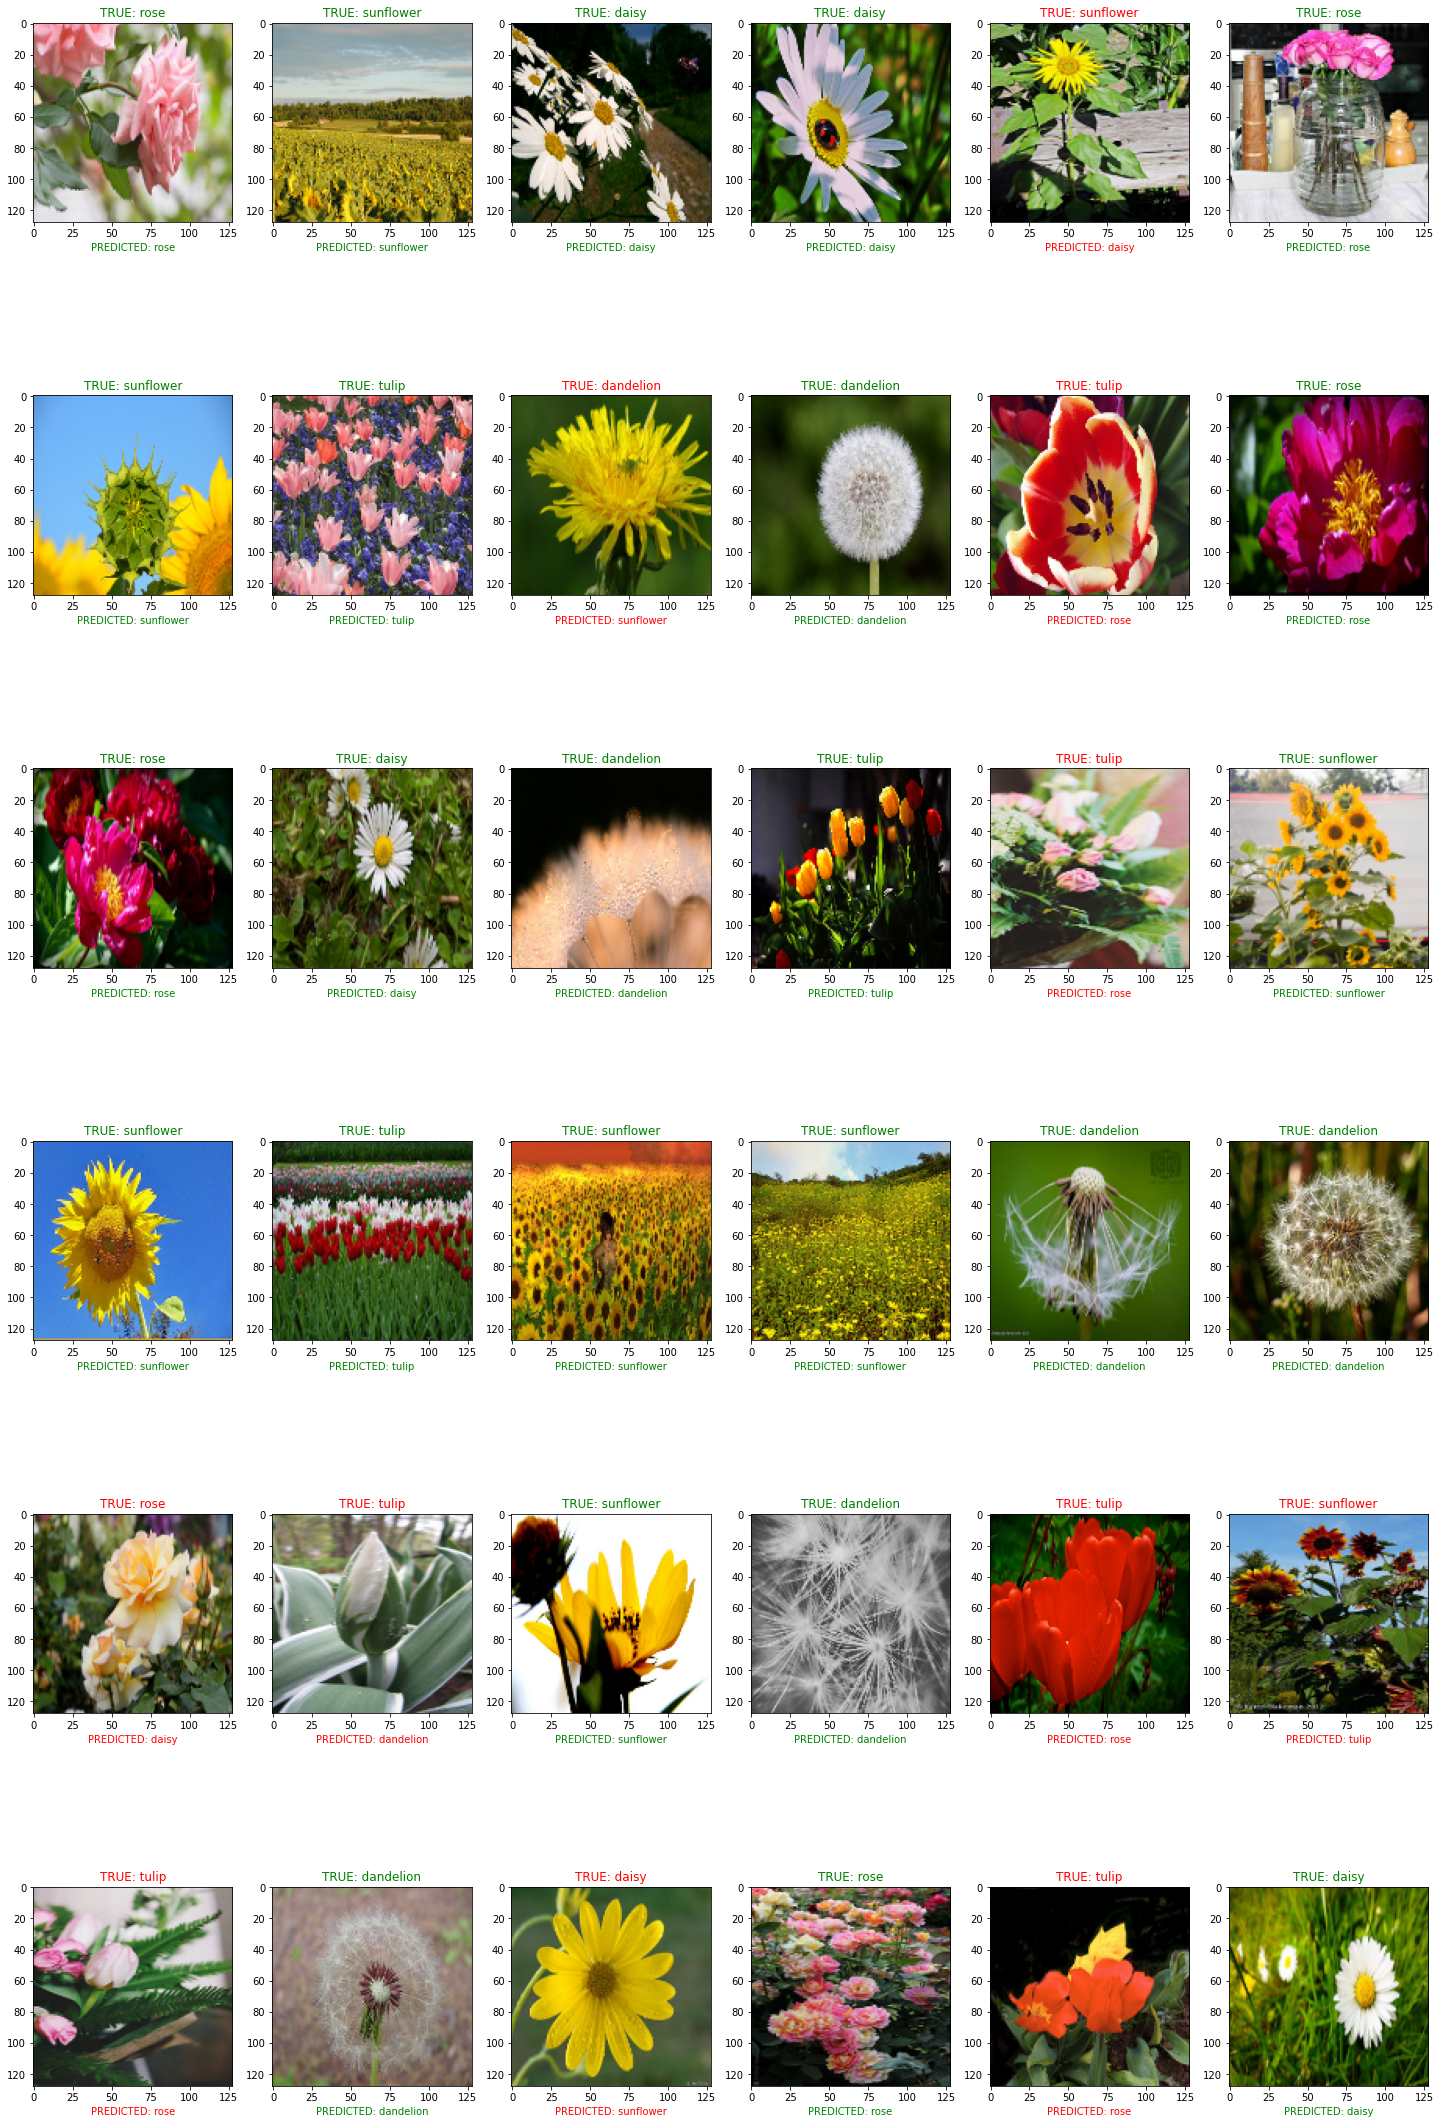

In [20]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')